<a href="https://colab.research.google.com/github/Daniel-Brett-Stark/PortfolioProjects/blob/main/MachineLearningProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the modules and function you will use here
import pandas as pd
import numpy as np

Regularized Regression

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

$(a)$ Split the data into a train and a test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

$(b)$ Use this data to fit an OLS, LASSO, ridge, and ElasticNet model on the data. For now, use the default for the penalty coefficient. Display the coefficients and test error for each.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#OLS
lr = LinearRegression().fit(X_train, y_train)
###Create a linear regerssion object-->lr = linear_model.LinearRegression()
###Train the model using training sets-->.fit(x_train, y_train)
#Ridge
ridge = Ridge().fit(X_train, y_train)
#Lasso
lasso = Lasso().fit(X_train, y_train)
#Elastic Net
EN = ElasticNet().fit(X_train, y_train)
print("OLS.coef_:", lr.coef_)
print("Ridge.coef_:", ridge.coef_)
print("Lasso.coef_:", lasso.coef_)
print("OLS Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Ridge Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Lasso Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("EN Test set score: {:.2f}".format(EN.score(X_test, y_test)))


OLS.coef_: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Ridge.coef_: [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Lasso.coef_: [-0.0838981   0.02646051 -0.          0.         -0.          1.54544951
  0.01345772 -0.58282853  0.20738089 -0.01121302 -0.70500625  0.01198848
 -0.75783702]
OLS Test set score: 0.68
Ridge Test set score: 0.68
Lasso Test set score: 0.65
EN Test set score: 0.66


$(c)$ Describe the differences that you see in the coefficients and error. What is the cause of this difference in coefficients?

In [5]:
#All of the errors are fairly similar with OLS and Ridge scoring the highest
#the Coefficients are much more different even though they are pulling from the same train & test sample
#Both OLS and Ridge had similar coefficients as well while Lasso and EN's coefficients were closer to each other.
#OLS provides a BLUE estimator meaning that variance could be very high. Ridge & Lasso don't do that so that would explain some difference away

$(d)$ Use K-fold cross validation to find an optimal penalty parameter for Ridge and Lasso.

In [6]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
lasso_scores = cross_val_score(lasso,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
#cross_val_score(estimator, x, y,how it will be scored , cv=number of scores)
#mean_square_error type of data measure the distance between the model and the data. They return the negated value of the metric.
#neg_mean_absolute_error measures the mean absolute error regression loss 
ridge_scores = cross_val_score(ridge,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
print("Lasso Cross-validation scores: {}".format(lasso_scores))
print("Ridge Cross-validation scores: {}".format(ridge_scores))
print("Average Lasso cross-validation score: {:.2f}".format(mean(absolute(lasso_scores))))
print("Average Ridge cross-validation score: {:.2f}".format(mean(absolute(ridge_scores))))

Lasso Cross-validation scores: [-4.05331725 -3.85569524 -4.16862244 -2.80832749 -3.75512077 -4.14603719
 -4.32880683 -3.15955767 -3.42914769 -4.13651553]
Ridge Cross-validation scores: [-3.46898109 -3.87462782 -4.10393948 -3.2419042  -2.96569063 -3.87285854
 -3.63999082 -3.18790283 -2.83445681 -3.61160095]
Average Lasso cross-validation score: 3.78
Average Ridge cross-validation score: 3.48


$(e)$ Now use cross validation, to find the optimal penalty parameter. Use LOOCV and Kfold cross validation with K=5 to find optimal parameters for the ElasticNet model. 

In [7]:
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
#LeaveOneOut()-->Provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.
EN_scores_loocv=cross_val_score(EN,X_train,y_train,scoring='neg_mean_absolute_error',cv=loocv)
#cv=loocv=LeaveOneOut()
EN_scores_kfolds=cross_val_score(EN,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print("EN LOOCV scores: {}".format(EN_scores_loocv))
print("EN K-folds 5 scores: {}".format(EN_scores_kfolds))
print("Average EN LOOCV score: {:.2f}".format(mean(absolute(EN_scores_loocv))))
print("Average EN K-folds 5 score: {:.2f}".format(mean(absolute(EN_scores_kfolds))))
print("The test errors are fairly the same which is surprising considering the number of variables compared in LOOCV vs the kfolds of 5")

#The test errors are fairly the same which is surprising considering the number of variables compared in LOOCV vs the kfolds of 5



EN LOOCV scores: [ -5.10351643  -4.82579134  -9.89559939  -3.42168642  -2.16435795
  -5.91029495  -1.1187363   -5.65855427  -3.65933568  -4.3083644
  -2.10049406  -2.00371274  -2.02987489  -1.28846846  -7.51220394
  -6.62315268  -5.76482225  -2.31611112  -5.86479214  -6.42277014
  -0.19358129  -0.45194802 -15.90571834  -2.3625962   -6.93357273
  -0.84744654  -2.18328407  -4.63136335  -1.01052878  -3.10558916
  -1.43790137  -3.34352283  -4.11959048  -5.26664396  -2.06660041
  -1.30376652  -3.42182496  -7.98387119  -0.66476973 -11.73056087
  -3.44167609  -1.60230635  -7.72301381  -3.8627881   -2.44248279
  -4.12826932  -8.64102698  -2.06451324  -0.47367794  -6.73384616
  -1.29037914  -4.45493111  -3.89615434  -0.08442743  -9.92112421
  -0.77335533  -0.72060514  -1.59966919  -2.02764648  -1.41304576
 -12.54761849 -19.92943569  -1.02598793  -1.33592411  -2.28548436
  -2.58093453  -6.49876122  -4.6131089   -0.25133318  -0.91143408
  -0.28959421  -3.40117786  -2.10999473  -5.27941144  -9.594


$(f)$ Out of all the models that have been tuned, which one performs best on the training data? Which one performs best on the test data? Which of these models allow us to do effective causal inference with the coefficients?

In [8]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
lassocv = LassoCV(cv=10).fit(X_train, np.ravel(y_train))
ridgecv = RidgeCV(cv=10).fit(X_train, np.ravel(y_train))
ENloocv = ElasticNetCV(cv=loocv).fit(X_train, np.ravel(y_train))
ENkfoldscv = ElasticNetCV(cv=5).fit(X_train, np.ravel(y_train))
print("Lasso Test set score: {:.2f}".format(lassocv.score(X_test,y_test)))
print("Ridge Test set score: {:.2f}".format(ridgecv.score(X_test,y_test)))
print("En LOOCV Test set score: {:.2f}".format(ENloocv.score(X_test,y_test)))
print("EN K folds Test set score: {:.2f}".format(ENkfoldscv.score(X_test,y_test)))
print("Training Data: Elastic net with the LOOCV cross validation")
print("Test Data: Ridge performed the best")
print("Causal inferences: I would us Ridge based on the train and test scores. The training set score was in the middle of the pack while the test score was the highest of all ")

#Causal inferences: I would us Ridge based on the train and test scores. The training set score was in the middle of the pack while the test score was the highest of all

Lasso Test set score: 0.66
Ridge Test set score: 0.68
En LOOCV Test set score: 0.64
EN K folds Test set score: 0.64
Training Data: Elastic net with the LOOCV cross validation
Test Data: Ridge performed the best
Causal inferences: I would us Ridge based on the train and test scores. The training set score was in the middle of the pack while the test score was the highest of all 


Load "Carseats" dataset. Convert the text variables into dummies (using Panda's "get_dummies") so that they can be used in the data

In [9]:
from google.colab import drive
from pandas import get_dummies
drive.mount('/content/gdrive')
%cd  '/content/gdrive/My Drive/School/Machine Learning'
df =pd.read_csv('/content/gdrive/My Drive/Econ 484/Carseats.csv')
df_new = pd.get_dummies(df, columns=['Urban','US','ShelveLoc'])
print(df_new.columns)
print(df_new.head(n=5))

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/gdrive/My Drive/School/Machine Learning'
/content
Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'Age', 'Education', 'Urban_No', 'Urban_Yes',
       'US_No', 'US_Yes', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium'],
      dtype='object')
   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0           1   9.50        138      73           11         276    120   42   
1           2  11.22        111      48           16         260     83   65   
2           3  10.06        113      35           10         269     80   59   
3           4   7.40        117     100            4         466     97   55   
4           5   4.15        141      64            3         340    128   38   

   Education  Urban_No  Urban_Yes  US_No  US_Yes  ShelveLoc_Bad  \
0         17         0          1      0       1              1   
1      

 Use `Sales` as the outcome variable  
(a) Split the data set into a training set and a test set.  
(b) Fit a regression tree to the training set with the default depth. Find the train and test MSE.

(c) Use cross-validation in order to determine the optimal level of tree complexity. Plot a tree with a depth of 3.

(d) Use a bagging approach in order to analyze this data. Find the test MSE obtained? Look at the feature importances attribute of your model object to determine which variables are most important.  
(e) Use random forests to analyze this data. Look at the feature importances attribute of your model object function to determine which variables are most important. 

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [11]:
#A
X1 =df_new.loc[:,[x for x in df_new.columns if x not in ('Sales')]]
y1 = df_new.loc[:,'Sales']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)


In [12]:
#B
tree= DecisionTreeRegressor().fit(X_train1,y_train1)
print("Train MSE: {:.2f}".format(tree.score(X_train1,y_train1))) 
print("Test MSE: {:.2f}".format(tree.score(X_test1,y_test1)))

Train MSE: 1.00
Test MSE: 0.53


In [13]:
tree=DecisionTreeRegressor()

In [14]:
#C Part 1
from pprint import pprint 

print(cross_val_score(tree,X_train1,y_train1,cv=10))
#cross_val_score won't work if 'tree' was fit previously. You've got to make a new 'tree' that isn't fit and run that 




[ 0.34328648  0.27679924  0.48746909  0.30895586 -0.08342073  0.13705663
 -0.02016004  0.4763684   0.49827233  0.32850589]


In [15]:
#C Part 2
from sklearn import tree

[Text(0.5, 0.875, 'X[13] <= 0.5\nsquared_error = 7.497\nsamples = 300\nvalue = 7.397'),
 Text(0.25, 0.625, 'X[5] <= 105.5\nsquared_error = 6.088\nsamples = 239\nvalue = 6.78'),
 Text(0.125, 0.375, 'X[6] <= 49.5\nsquared_error = 5.498\nsamples = 79\nvalue = 8.294'),
 Text(0.0625, 0.125, 'squared_error = 2.945\nsamples = 32\nvalue = 9.718'),
 Text(0.1875, 0.125, 'squared_error = 4.918\nsamples = 47\nvalue = 7.325'),
 Text(0.375, 0.375, 'X[12] <= 0.5\nsquared_error = 4.689\nsamples = 160\nvalue = 6.032'),
 Text(0.3125, 0.125, 'squared_error = 4.084\nsamples = 114\nvalue = 6.54'),
 Text(0.4375, 0.125, 'squared_error = 3.963\nsamples = 46\nvalue = 4.774'),
 Text(0.75, 0.625, 'X[5] <= 135.0\nsquared_error = 5.683\nsamples = 61\nvalue = 9.814'),
 Text(0.625, 0.375, 'X[5] <= 73.0\nsquared_error = 3.74\nsamples = 48\nvalue = 10.572'),
 Text(0.5625, 0.125, 'squared_error = 1.171\nsamples = 3\nvalue = 14.327'),
 Text(0.6875, 0.125, 'squared_error = 2.909\nsamples = 45\nvalue = 10.321'),
 Text(0.8

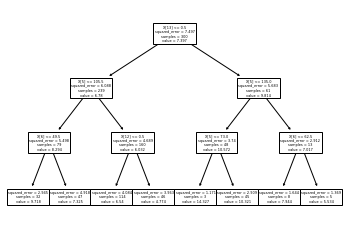

In [16]:
#C Part 3
tree3 = DecisionTreeRegressor(max_depth=3).fit(X_train1,y_train1)
tree.plot_tree(tree3)

In [17]:
print("Train MSE: {:.2f}".format(tree3.score(X_train1,y_train1))) 
print("Test MSE: {:.2f}".format(tree3.score(X_test1,y_test1)))

#Pruning the tree does improve test MSE 

Train MSE: 0.50
Test MSE: 0.45


In [18]:
#D
from sklearn.ensemble import BaggingRegressor
Bag = BaggingRegressor().fit(X_train1, y_train1)
print("Test MSE: {:.2f}".format(Bag.score(X_test1,y_test1)))


Test MSE: 0.65


In [19]:
Bag.estimators_

[DecisionTreeRegressor(random_state=2008819210),
 DecisionTreeRegressor(random_state=1125674126),
 DecisionTreeRegressor(random_state=14596649),
 DecisionTreeRegressor(random_state=1431705561),
 DecisionTreeRegressor(random_state=1517105052),
 DecisionTreeRegressor(random_state=1499038213),
 DecisionTreeRegressor(random_state=1269966975),
 DecisionTreeRegressor(random_state=1264239866),
 DecisionTreeRegressor(random_state=1325936581),
 DecisionTreeRegressor(random_state=1146089087)]

In [20]:
for x in [1,2,3]:
  print(x)
  break

1


In [21]:
sum([m.feature_importances_ for m in Bag.estimators_])

array([0.4909096 , 1.0774774 , 0.38742937, 0.83693629, 0.27158842,
       2.9738267 , 1.00755722, 0.24986316, 0.02306864, 0.0524269 ,
       0.07830709, 0.01325898, 0.30124129, 2.00398563, 0.2321233 ])

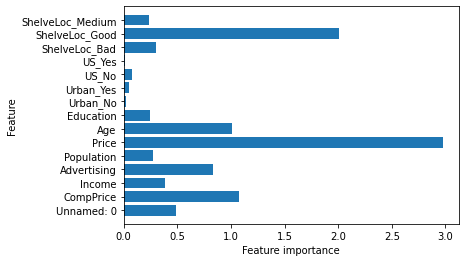

In [22]:
def plot_feature_importances_Sales(model):
    n_features = X_train1.shape[1]
    plt.barh(np.arange(n_features), sum([m.feature_importances_ for m in Bag.estimators_]), align='center')
    plt.yticks(np.arange(n_features), (X_train1).columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances_Sales(Bag)

#Price, ShelveLoc_Good, Age, and CompPrice are the most impportant features 

In [23]:
#E
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=2)
forest.fit(X_train1, y_train1)
print("Test MSE: {:.2f}".format(forest.score(X_test1,y_test1)))




Test MSE: 0.69


In [24]:
#E
(X_train1).columns

Index(['Unnamed: 0', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',
       'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium'],
      dtype='object')

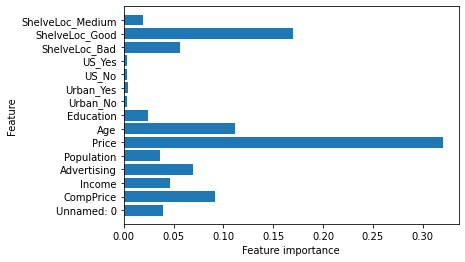

In [25]:
#E
def plot_feature_importances_sale(model):
    n_features = X_train1.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (X_train1).columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances_sale(forest)

In [26]:
#E
print("Test MSE: {:.3f}".format(forest.score(X_test1,y_test1)))

#The most important features are still largely the same. 

Test MSE: 0.687


In [27]:
dir(tree)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export_graphviz',
 'export_text',
 'plot_tree']

Use boosting to predict Log Salary in the `Hitters` data set.  
(a) Appropriately format the data. Use 200 observations in your training set.  
(b) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis. Add a curve with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis. 

(c) Which variables appear to be the most important predictors in the boosted model?

(d) Find out if a maximum deph of 3 is the optimal depth for the default for the Decision Tree base estimator. 

(e) Compare the results to bagging and random forests. Report test errors for your models.

In [28]:
#A 
hitters = pd.read_csv('/content/gdrive/My Drive/Econ 484/Hitters.csv')
hitters1=hitters.sample(200, random_state=1000)
print(hitters.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


<bound method NDFrame.head of      AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  ...  \
0      293    66      1    30   29     14      1     293     66       1  ...   
1      315    81      7    24   38     39     14    3449    835      69  ...   
2      479   130     18    66   72     76      3    1624    457      63  ...   
3      496   141     20    65   78     37     11    5628   1575     225  ...   
4      321    87     10    39   42     30      2     396    101      12  ...   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...  ...   
317    497   127      7    65   48     37      5    2703    806      32  ...   
318    492   136      5    76   50     94     12    5511   1511      39  ...   
319    475   126      3    61   43     52      6    1700    433       7  ...   
320    573   144      9    85   60     78      8    3198    857      97  ...   
321    631   170      9    77   44     31     11    4908   1457      30  ...   

     PutO

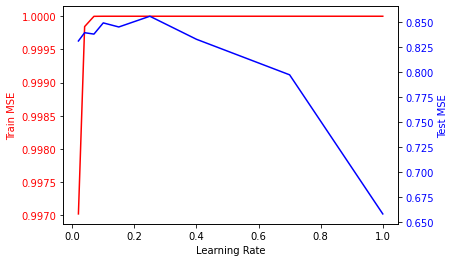

In [29]:
#B
from sklearn.ensemble import GradientBoostingRegressor
hittersdummies=pd.get_dummies(hitters, columns=['League','Division', 'NewLeague'])
print(hittersdummies.head)
h_new=hittersdummies.dropna()

y=np.log(h_new ['Salary'])
x=h_new.loc[:,[x for x in h_new.columns if x not in ('Salary')]]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

lambdas = [.02, .04, .07, .1, .15, .25, .4, .7, 1]
train_mse = []
test_mse = []

for lambda_ in lambdas:
  gbrt = GradientBoostingRegressor(learning_rate=lambda_, 
                                   n_estimators=1000).fit(x_train, y_train)
  train_mse.append(gbrt.score(x_train, y_train))
  test_mse.append(gbrt.score(x_test, y_test))

fig, ax1 = plt.subplots() 

ax1.set_xlabel('Learning Rate') 
ax1.set_ylabel('Train MSE', color = 'red') 
ax1.plot(lambdas, train_mse, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 

ax2 = ax1.twinx() 
ax2.set_ylabel('Test MSE', color = 'blue') 
ax2.plot(lambdas, test_mse, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 

plt.show()

In [30]:
#C- Answers are embedded in the text cell above 

Text(0.5, 1.0, 'Feature')

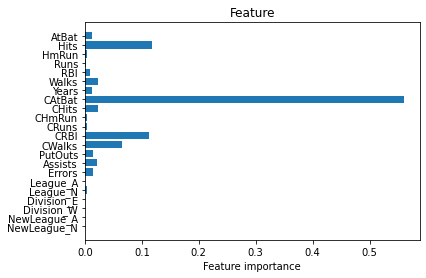

In [31]:
#C
fig, ax=plt.subplots()
ax.barh(np.arange(len(gbrt.feature_importances_)),
          gbrt.feature_importances_, align='center')
ax.set_yticks(np.arange(len(gbrt.feature_importances_)))
ax.set_yticklabels(gbrt.feature_names_in_)
ax.invert_yaxis()
ax.set_xlabel('Feature importance')
ax.set_title('Feature')

#CAtBat is by far the most influential feature on salary. The next most important influential features would be CRBI, Hits, and AtBat. 

In [32]:
tree1=DecisionTreeRegressor().fit(x_train, y_train)

In [33]:
#D-The default for base estimator is a Decision Tree with a maximum depth of 3. Is that the optimal depth? Justify your response.
tree2 = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
print("Train MSE: {:.2f}".format(tree2.score(x_train, y_train)))
print("Test MSE: {:.2f}".format(tree2.score(x_test, y_test)))

Train MSE: 0.80
Test MSE: 0.39


In [34]:
#D
tree4 = DecisionTreeRegressor(max_depth=4).fit(x_train,y_train)
print("Train MSE: {:.2f}".format(tree4.score(x_train, y_train)))
print("Test MSE: {:.2f}".format(tree4.score(x_test, y_test)))

Train MSE: 0.85
Test MSE: 0.81


In [35]:
#D
tree5 = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)
print("Train MSE: {:.2f}".format(tree5.score(x_train, y_train)))
print("Test MSE: {:.2f}".format(tree5.score(x_test, y_test)))

Train MSE: 0.90
Test MSE: 0.79


In [36]:
#D
tree6 = DecisionTreeRegressor(max_depth=6).fit(x_train,y_train)
print("Train MSE: {:.2f}".format(tree6.score(x_train, y_train)))
print("Test MSE: {:.2f}".format(tree6.score(x_test, y_test)))

Train MSE: 0.92
Test MSE: 0.78


In [37]:
#D
#A depth of 4 is the optimal depth. The numbers are higher for both training and test on a depth of four as opposed to three. However, they also don't appear to be overfit 

In [38]:
#The best test error rate comes from Random Forest. The next best comes from a tie between bagging and boosting. 


In [39]:
#E
#Bagging
Bag2 = BaggingRegressor().fit(x_train, y_train)
print("Test MSE: {:.2f}".format(Bag2.score(x_test,y_test)))

Test MSE: 0.81


In [40]:
#E
#Random Forest
forest9 = RandomForestRegressor()
forest9.fit(x_train, y_train)
print("Test MSE: {:.2f}".format(forest9.score(x_test,y_test)))

Test MSE: 0.84


In [41]:
#E
#Boosting Test MSE: 0.81 (see above)

Use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.  

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.  
(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter.  
(c) Make an ROC curve for your model. 

In [42]:
auto=pd.read_csv('/content/gdrive/My Drive/Econ 484/Auto.csv')
#A
np.median(auto.mpg)
binary = (auto["mpg"] >= auto["mpg"].median()) * 1



In [43]:
#B Part 1
y= binary
#trying to predict this
from sklearn.svm import LinearSVC
X =auto.loc[:,['year', 'origin', 'acceleration', 'cylinders', 'displacement', 'weight']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=0)

lsvc = LinearSVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(lsvc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc.score(X_test, y_test)))




Training set score: 0.896
Test set score: 0.950


In [44]:
#B Part 2
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# define grid for parameters
param_grid = {'C': [17, 18, 19, 20, 21, 22, 23, 24],'kernel':['rbf','poly','linear']}
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best of C",best_model.best_estimator_.get_params('C'))
print("Best kernel: ",best_model.best_estimator_.get_params()['kernel'])

# print out scores
print("Accuracy on training set: {:.3f}".format(
    best_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(X_test, y_test)))

#The test set has slightly better results than the training set

Best of C {'C': 20, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best kernel:  rbf
Accuracy on training set: 0.953
Accuracy on test set: 0.960


In [45]:
#C Part 1
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty='none').fit(X_train, y_train)
print("logit.coef_:", logit.coef_)
print("logit.intercept_:", logit.intercept_)

logit.coef_: [[ 1.61944795  0.21780829  0.61462884 -0.01176822  0.20501941 -4.3581315 ]]
logit.intercept_: [-0.90117008]


In [46]:
#C Part 2
phat_test=logit.predict_proba(X_test)
phat_test=phat_test[:,1]
phat_test

array([1.16691393e-04, 6.22026776e-01, 8.87119669e-05, 1.37312082e-01,
       7.93967333e-03, 9.89992709e-01, 9.95370652e-01, 7.04407929e-01,
       1.62003711e-04, 7.91137881e-01, 9.91822538e-01, 9.92521542e-01,
       8.98235925e-02, 9.39529629e-01, 9.99600404e-01, 8.06015519e-01,
       4.65704126e-01, 9.98517817e-01, 6.88034918e-03, 7.27457950e-01,
       6.08435335e-04, 8.57478740e-01, 9.73229276e-01, 6.19186123e-02,
       9.97158369e-01, 1.89904456e-01, 9.32287291e-01, 9.78378893e-01,
       8.45374101e-01, 9.29088012e-03, 3.95464625e-01, 9.77039740e-01,
       7.27585930e-02, 9.36481024e-01, 8.80039920e-02, 7.34181948e-01,
       9.72164081e-01, 9.61146262e-01, 9.71698975e-01, 2.18438308e-06,
       7.61623196e-06, 3.25917323e-04, 9.94819389e-01, 9.76913375e-01,
       9.79976162e-01, 2.71797864e-01, 2.46839710e-01, 9.63183454e-01,
       4.41093990e-01, 9.64222615e-01, 6.07875239e-01, 9.03582955e-01,
       1.08663527e-03, 7.76382495e-01, 4.85285086e-04, 1.95046893e-05,
      

In [47]:
#C Part 3
tpr=[0]*100
fpr=[0]*100
for i in range(100):
     tau=i/100
     yhat_test=phat_test>=tau
     tp=sum(yhat_test*y_test) 
     p=sum(y_test)
     tpr[i]=tp/p
     n=sum(1-y_test)
     fp=sum(yhat_test*(1-y_test))
     fpr[i]=fp/n

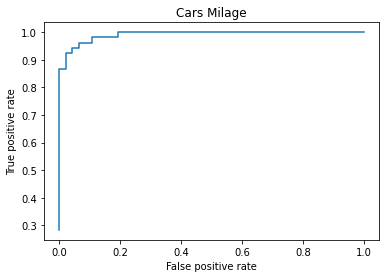

In [48]:
#C Part 4
fig = plt.figure()
ax = plt.axes()
ax.plot(fpr,tpr);
plt.title("Cars Milage")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");

Below there are some generated datasets of varying structure that you will classifying is SVMs, plotting the data to see what it looks like will likey be helpful. Find the basis kernel that does best job classifying each of them. 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


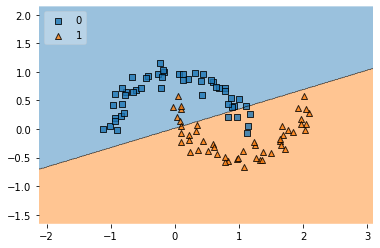

In [49]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, shuffle=True, noise=1/10, random_state=123)

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm = SVC(C=0.5, kernel='linear')
svm.fit(x, y)
plot_decision_regions(x, y, clf=svm, legend=2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


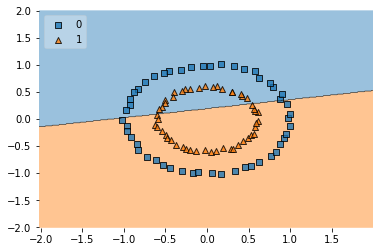

In [50]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=100, shuffle=False, noise=1/50, random_state=123, factor=0.6)

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm = SVC(C=0.5, kernel='linear')
svm.fit(x, y)
plot_decision_regions(x, y, clf=svm, legend=2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


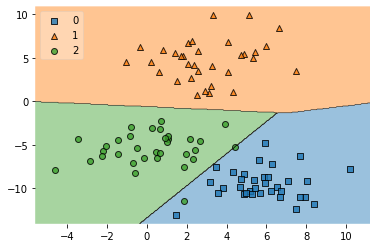

In [51]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=2.0,
           center_box=(-10.0, 10.0), shuffle=True, random_state=10)

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm = SVC(C=0.5, kernel='linear')
svm.fit(x, y)
plot_decision_regions(x, y, clf=svm, legend=2)